1. 
    - “images/jpg/office_1.jpg”  dosyasında yer alan renkli görüntünün 3  ayrı  kanalı  için  histogramını  hesaplayıp  analiz  ediniz.  

    - Her bir  renk  kanalında  histogram  eşitleme gerçekleştiriniz.  

    - Neticede  oluşan görüntünün  görünümünü  ve  histogram  analizini  yapınız.

    - Yine  orijinal  görüntünün  her  bir renk kanalında  duruma  göre  log  veya  ters  log  dönüşümü gerçekleştiriniz.  

    - Neticede  oluşan görüntünün  görünümünü  ve  histogram  analizini  yapınız.

    - Uyguladığınız yaklaşımların görüntü kalitesini arttırmadaki etkinliğini değerlendiriniz.

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

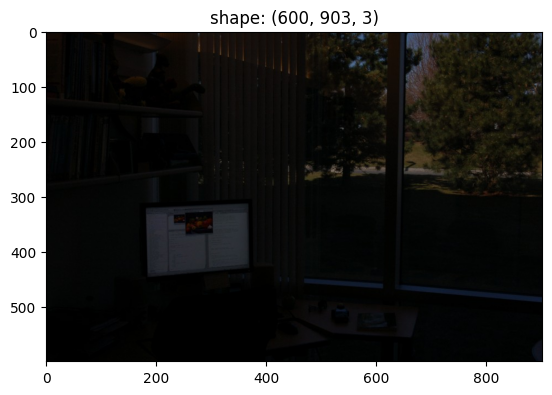

In [2]:
from utils import img_read
img = img_read('../images/jpg/office_1.jpg')

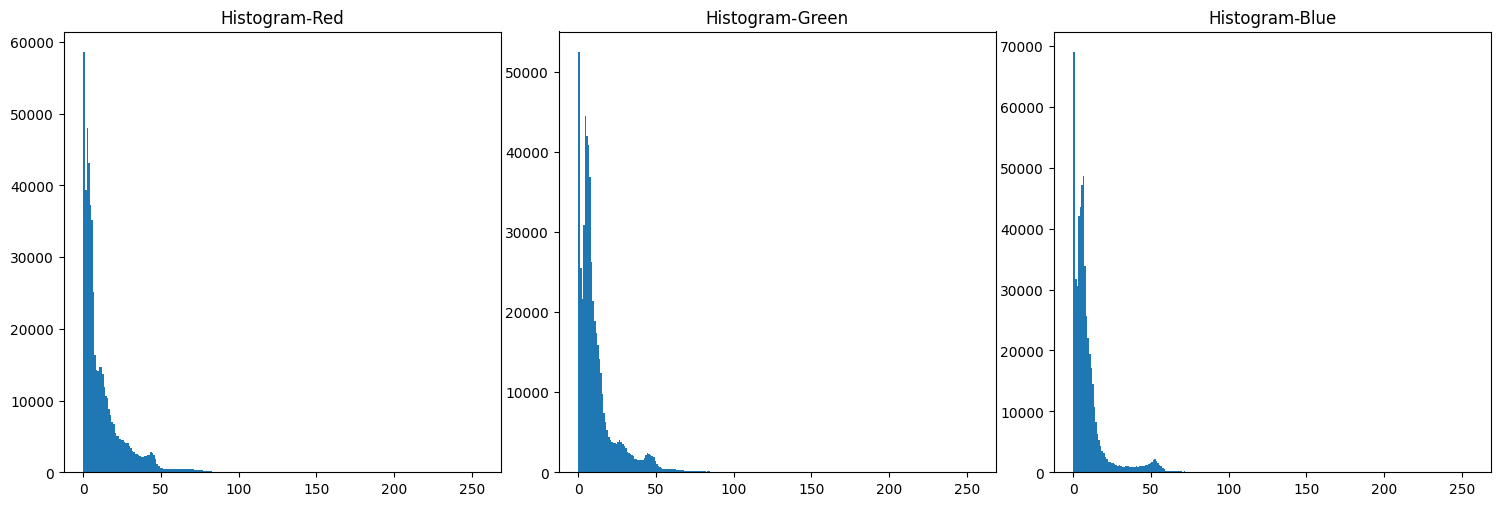

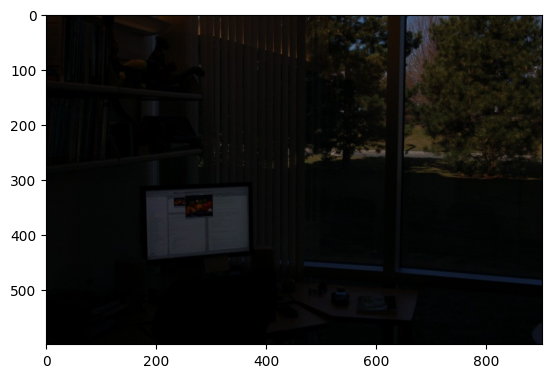

In [3]:
from utils import show_hist
show_hist(img, channel_order="RGB", cumulative=False, bins=256)

- Her bir  renk  kanalında  histogram  eşitleme gerçekleştiriniz.
- Neticede  oluşan görüntünün  görünümünü  ve  histogram  analizini  yapınız.


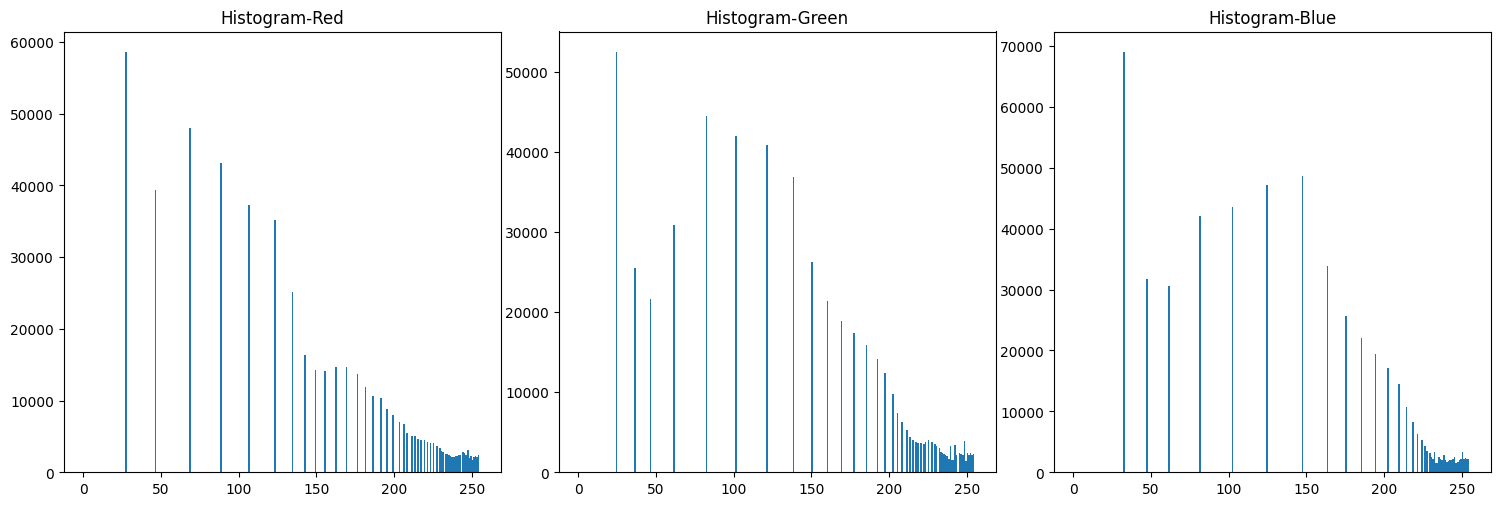

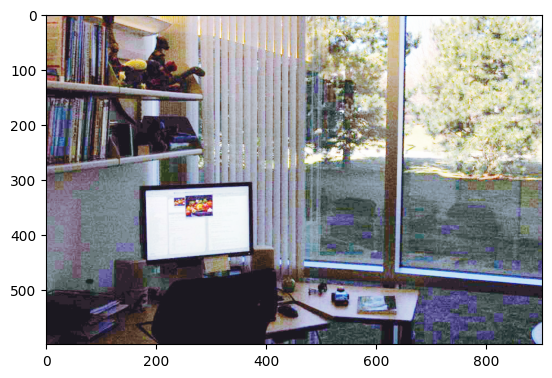

In [9]:
def hist_equalization(img_array):
    
    # STEP 1: Normalized cumulative histogram
    
    #flatten image array and calculate histogram via binning
    histogram_array = np.bincount(img_array.flatten(), minlength=256)
    #normalize
    num_pixels = np.sum(histogram_array)
    histogram_array = histogram_array/num_pixels
    #cumulative histogram
    chistogram_array = np.cumsum(histogram_array)

    # STEP 2: Pixel mapping lookup table    
    transform_map = np.floor(255 * chistogram_array).astype(np.uint8)


    # STEP 3: Transformation
    eq_img_array = np.take(transform_map, img_array)
    return eq_img_array


img_hist_eq = np.zeros(img.shape, dtype=np.uint8)
for i in range(img.shape[-1]):
    img_hist_eq[:,:,i] = hist_equalization(img[:,:,i])

show_hist(img_hist_eq, channel_order="RGB", cumulative=False, bins=256)

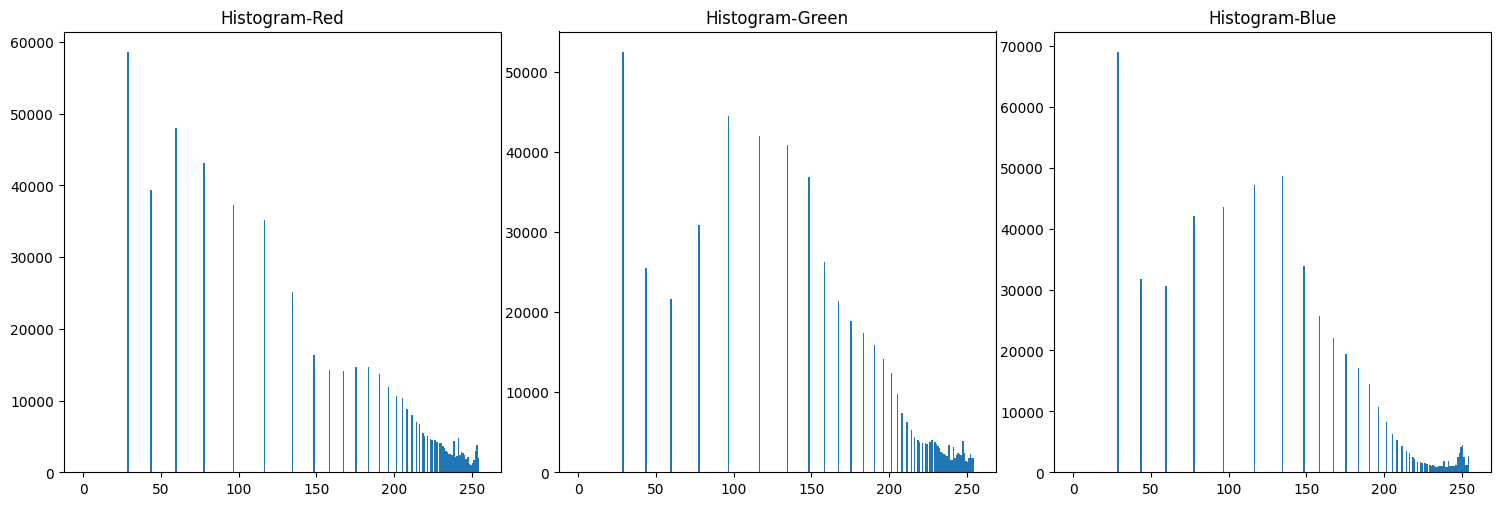

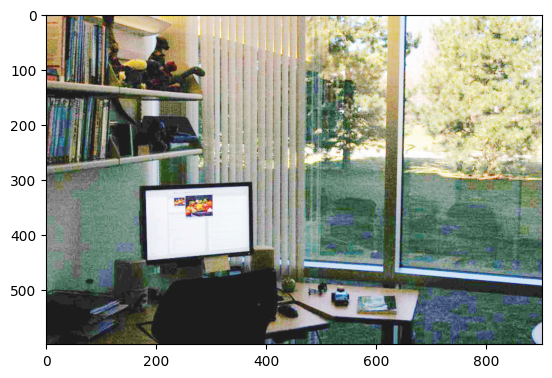

In [13]:
img_hist_eq = hist_equalization(img)
show_hist(img_hist_eq, channel_order="RGB", bins=256)

- Yine  orijinal  görüntünün  her  bir renk kanalında  duruma  göre  log  veya  ters  log  dönüşümü gerçekleştiriniz.  

- Neticede  oluşan görüntünün  görünümünü  ve  histogram  analizini  yapınız.